In [77]:
import json
import os

# Specify the file path
file_names = ['roberta_notcombined','roberta_combined','xlnet_notcombined','xlnet_combined','bert_notcombined','bert_combined']


data_log = {}
for i in file_names:
    file_path = 'trainer_states/' + i + '.json'
    file_name = i
    with open(file_path, 'r') as file:
        # Load the JSON data
        data = json.load(file)
        
    # Append the log_history to data_log
    data_log[i] = data["log_history"]
print(data_log)
    

{'roberta_notcombined': [{'epoch': 0.05, 'learning_rate': 1.9e-05, 'loss': 0.581, 'step': 500}, {'epoch': 0.09, 'learning_rate': 1.8e-05, 'loss': 0.5366, 'step': 1000}, {'epoch': 0.09, 'eval_accuracy': 0.743, 'eval_loss': 0.5263335108757019, 'eval_runtime': 30.064, 'eval_samples_per_second': 99.787, 'eval_steps_per_second': 12.473, 'step': 1000}, {'epoch': 0.14, 'learning_rate': 1.7e-05, 'loss': 0.5223, 'step': 1500}, {'epoch': 0.18, 'learning_rate': 1.6000000000000003e-05, 'loss': 0.5133, 'step': 2000}, {'epoch': 0.18, 'eval_accuracy': 0.758, 'eval_loss': 0.49703481793403625, 'eval_runtime': 30.113, 'eval_samples_per_second': 99.625, 'eval_steps_per_second': 12.453, 'step': 2000}, {'epoch': 0.23, 'learning_rate': 1.5000000000000002e-05, 'loss': 0.5092, 'step': 2500}, {'epoch': 0.27, 'learning_rate': 1.4e-05, 'loss': 0.5048, 'step': 3000}, {'epoch': 0.27, 'eval_accuracy': 0.7626666666666667, 'eval_loss': 0.49794840812683105, 'eval_runtime': 30.1316, 'eval_samples_per_second': 99.563, '

In [78]:
loss = {}
eval_loss = {}
eval_accuracy = {}


for file_name, file_data in data_log.items():
    learning_rate_eval = [entry for entry in file_data if "learning_rate" in entry]
    eval_values = [entry for entry in file_data if "learning_rate" not in entry and "train_runtime" not in entry]

    loss[file_name] = {entry["step"]:entry["loss"] for entry in learning_rate_eval}
    eval_loss[file_name]={entry["step"]:entry['eval_loss'] for entry in eval_values}
    eval_accuracy[file_name]={entry["step"]:entry['eval_accuracy'] for entry in eval_values}

print(loss)



{'roberta_notcombined': {500: 0.581, 1000: 0.5366, 1500: 0.5223, 2000: 0.5133, 2500: 0.5092, 3000: 0.5048, 3500: 0.4986, 4000: 0.4932, 4500: 0.4946, 5000: 0.4908, 5500: 0.4901, 6000: 0.4832, 6500: 0.4796, 7000: 0.4832, 7500: 0.4772, 8000: 0.4756, 8500: 0.4785, 9000: 0.4795, 9500: 0.4734, 10000: 0.4758}, 'roberta_combined': {500: 0.6004, 1000: 0.5383, 1500: 0.5157, 2000: 0.5054, 2500: 0.4963, 3000: 0.4901, 3500: 0.4844, 4000: 0.4798, 4500: 0.4815, 5000: 0.4758, 5500: 0.4744, 6000: 0.4688, 6500: 0.4622, 7000: 0.4677, 7500: 0.4613, 8000: 0.4564, 8500: 0.4592, 9000: 0.4605, 9500: 0.4593, 10000: 0.4544}, 'xlnet_notcombined': {500: 0.6093, 1000: 0.5685, 1500: 0.5449, 2000: 0.5348, 2500: 0.5247, 3000: 0.5259, 3500: 0.5119, 4000: 0.5146, 4500: 0.5075, 5000: 0.4994, 5500: 0.4982, 6000: 0.5005, 6500: 0.4939, 7000: 0.4911, 7500: 0.4863, 8000: 0.4886, 8500: 0.4886, 9000: 0.4851, 9500: 0.4849, 10000: 0.4835}, 'xlnet_combined': {500: 0.6096, 1000: 0.5526, 1500: 0.5304, 2000: 0.5188, 2500: 0.5058, 30

[0.74611111 0.76111111 0.765      0.77544444 0.78033333 0.78555556
 0.78544444 0.78877778 0.79122222 0.79188889]


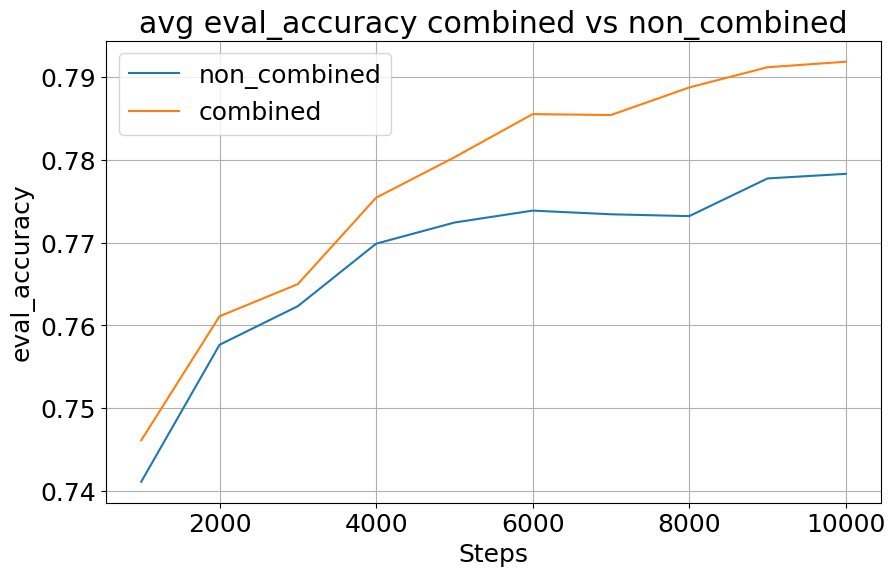

In [90]:
import matplotlib.pyplot as plt
import numpy as np

file_name = "eval_accuracy"

fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams.update({'font.size': 18})

titles, dicts = zip(*eval_accuracy.items())
num_dicts = len(dicts)

combined= None
non_combined = None
x_plot = []

title = "hello"
for i in range(0, num_dicts - 1, 2):
    title1, title2 = titles[i], titles[i + 1]
    dict1, dict2 = dicts[i], dicts[i + 1]
    x_plot,y1_plot = zip(*dict1.items())
    x_plot,y2_plot = zip(*dict2.items())
    y1_plot_numeric = np.array(y1_plot, dtype=float)
    y2_plot_numeric = np.array(y2_plot, dtype=float)
    if combined is None:
        # If average_combined is not yet initialized, set it to the first array
        combined = y2_plot_numeric
    else:
        # Add the current array to average_combined
        combined += y2_plot_numeric
    if non_combined is None:
        # If average_combined is not yet initialized, set it to the first array
        non_combined = y1_plot_numeric
    else:
        # Add the current array to average_combined
        non_combined += y1_plot_numeric

combined /= (num_dicts // 2)
non_combined /= (num_dicts // 2)
print(combined)

ax.plot(x_plot, non_combined, label="non_combined")
ax.plot(x_plot, combined, label="combined")

ax.set_xlabel('Steps')
ax.set_ylabel(file_name)
ax.set_title( "avg "+ file_name +" combined vs non_combined")

ax.legend()

plt.grid(True)
plt.show()

[0.60286667 0.54663333 0.526      0.51556667 0.506      0.5031
 0.49446667 0.4921     0.48933333 0.4811     0.48056667 0.48043333
 0.47413333 0.4752     0.4703     0.46703333 0.46883333 0.4669
 0.46663333 0.46466667]


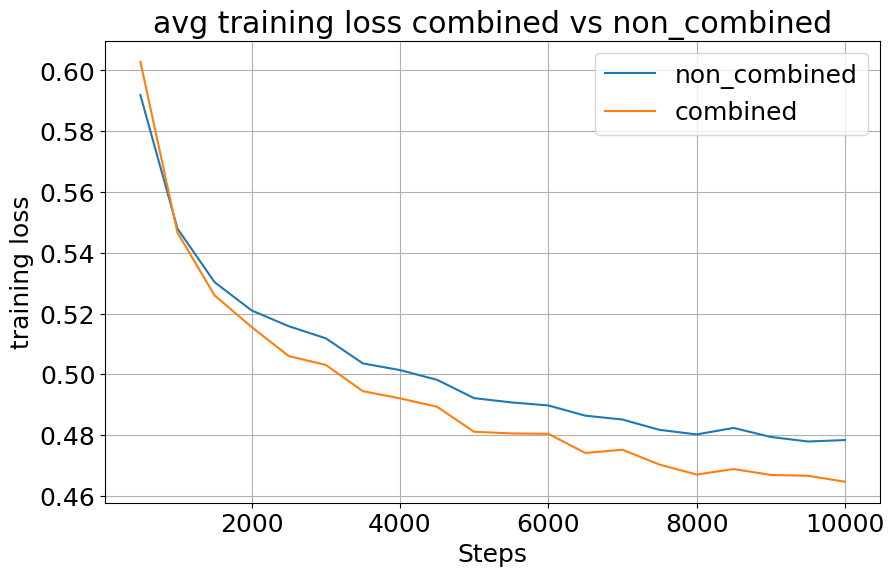

In [89]:
file_name = "training loss"

fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams.update({'font.size': 18})

titles, dicts = zip(*loss.items())
num_dicts = len(dicts)

combined= None
non_combined = None
x_plot = []

title = "hello"
for i in range(0, num_dicts - 1, 2):
    title1, title2 = titles[i], titles[i + 1]
    dict1, dict2 = dicts[i], dicts[i + 1]
    x_plot,y1_plot = zip(*dict1.items())
    x_plot,y2_plot = zip(*dict2.items())
    y1_plot_numeric = np.array(y1_plot, dtype=float)
    y2_plot_numeric = np.array(y2_plot, dtype=float)
    if combined is None:
        # If average_combined is not yet initialized, set it to the first array
        combined = y2_plot_numeric
    else:
        # Add the current array to average_combined
        combined += y2_plot_numeric
    if non_combined is None:
        # If average_combined is not yet initialized, set it to the first array
        non_combined = y1_plot_numeric
    else:
        # Add the current array to average_combined
        non_combined += y1_plot_numeric

combined /= (num_dicts // 2)
non_combined /= (num_dicts // 2)
print(combined)

ax.plot(x_plot, non_combined, label="non_combined")
ax.plot(x_plot, combined, label="combined")


ax.set_xlabel('Steps')
ax.set_ylabel(file_name)
ax.set_title( "avg "+ file_name +" combined vs non_combined")

ax.legend()

plt.grid(True)
plt.show()

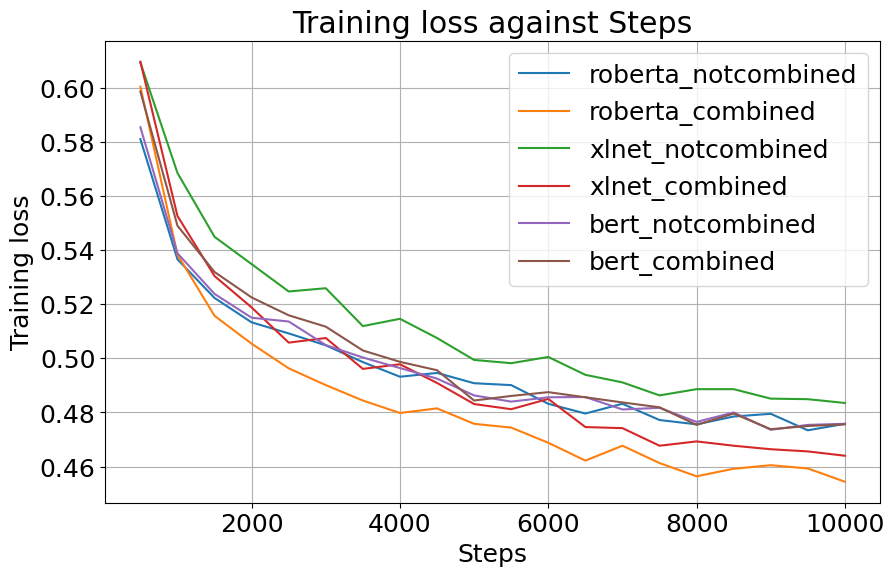

In [81]:
#Plotting Traing Loss
import matplotlib.pyplot as plt

file_name = "Training loss"
titles, dicts = zip(*loss.items())
fig, ax = plt.subplots(figsize=(10, 6))
for title, dictionary in zip(titles, dicts):
    plt.rcParams.update({'font.size': 18})
    x_plot,y_plot = zip(*dictionary.items())
    ax.plot(x_plot, y_plot, label=title)

ax.set_xlabel('Steps')
ax.set_ylabel(file_name)
ax.set_title( file_name+ " against Steps")

ax.legend()

plt.grid(True)
plt.show()

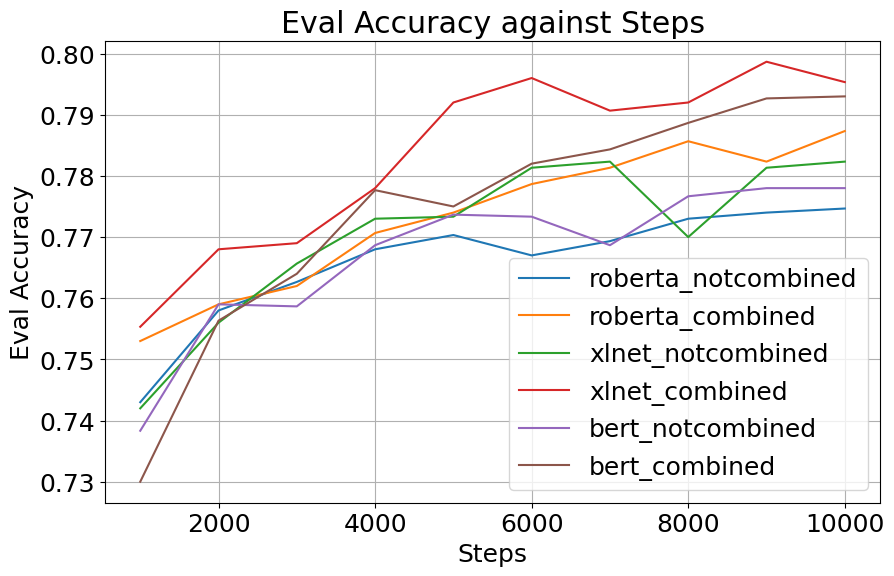

In [82]:
file_name = "Eval Accuracy"
titles, dicts = zip(*eval_accuracy.items())
fig, ax = plt.subplots(figsize=(10, 6))
for title, dictionary in zip(titles, dicts):
    plt.rcParams.update({'font.size': 18})
    x_plot,y_plot = zip(*dictionary.items())
    ax.plot(x_plot, y_plot, label=title)

ax.set_xlabel('Steps')
ax.set_ylabel(file_name)
ax.set_title( file_name+ " against Steps")

ax.legend()

plt.grid(True)
plt.show()

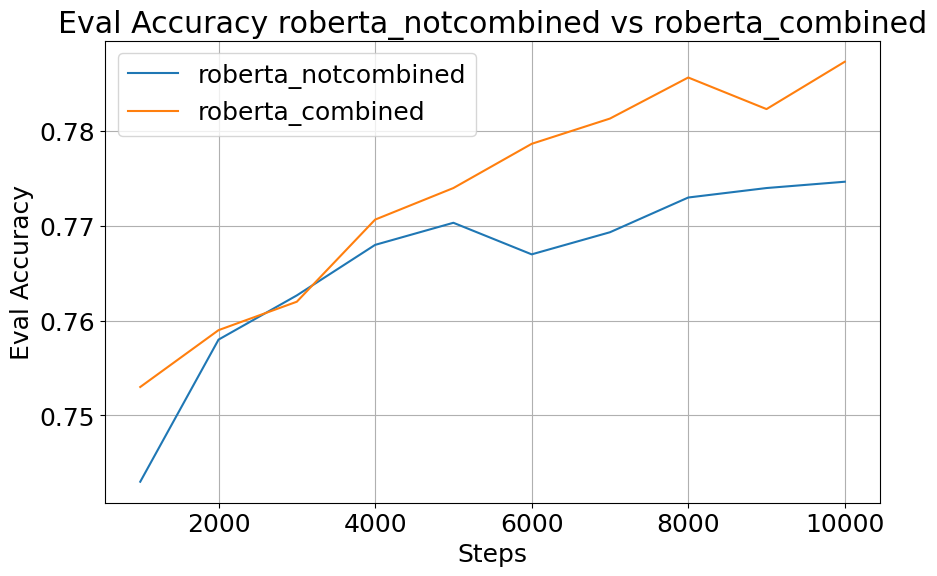

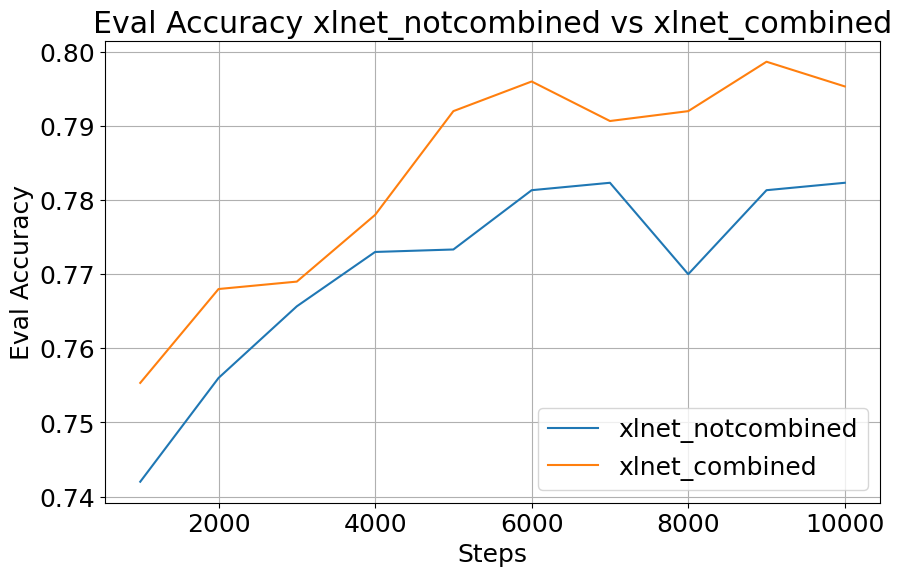

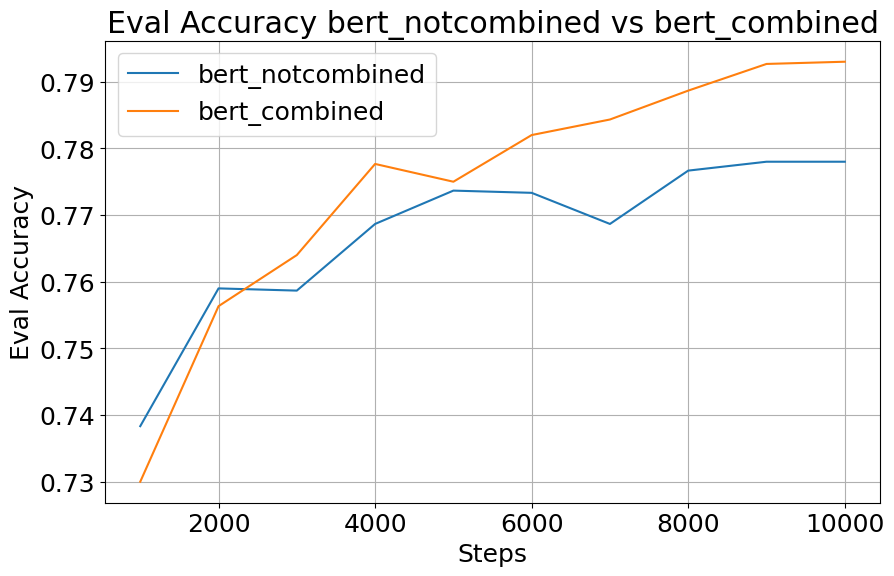

In [83]:
#PLottig individual models eval graphs
file_name = "Eval Accuracy"
titles, dicts = zip(*eval_accuracy.items())
num_dicts = len(dicts)

for i in range(0, num_dicts - 1, 2):
    plt.rcParams.update({'font.size': 18})
    title1, title2 = titles[i], titles[i + 1]
    dict1, dict2 = dicts[i], dicts[i + 1]
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(*zip(*dict1.items()), label=title1)
    ax.plot(*zip(*dict2.items()), label=title2)

    ax.set_xlabel('Steps')
    ax.set_ylabel(file_name)
    ax.set_title(file_name +" "+ title1 + " vs " + title2)

    ax.legend()

    plt.grid(True)
    plt.show()

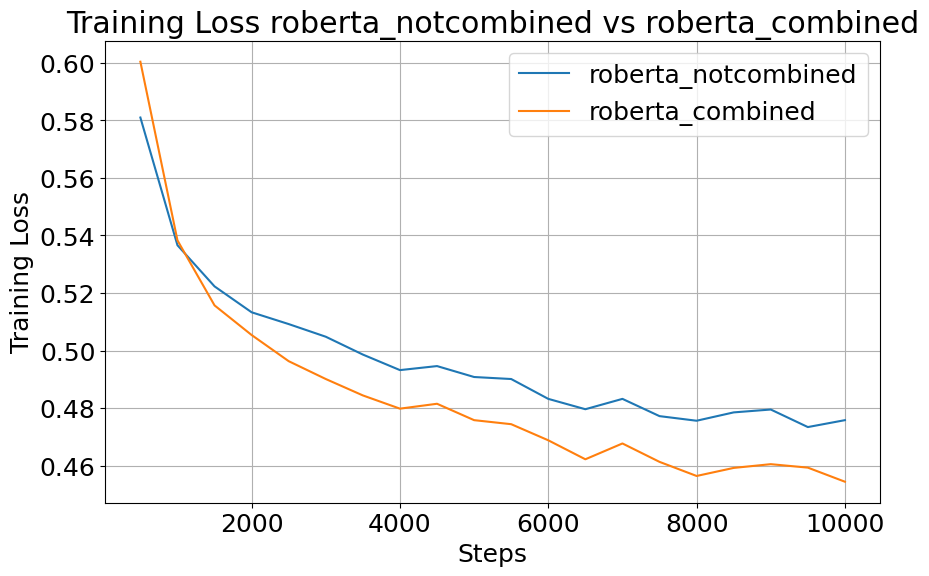

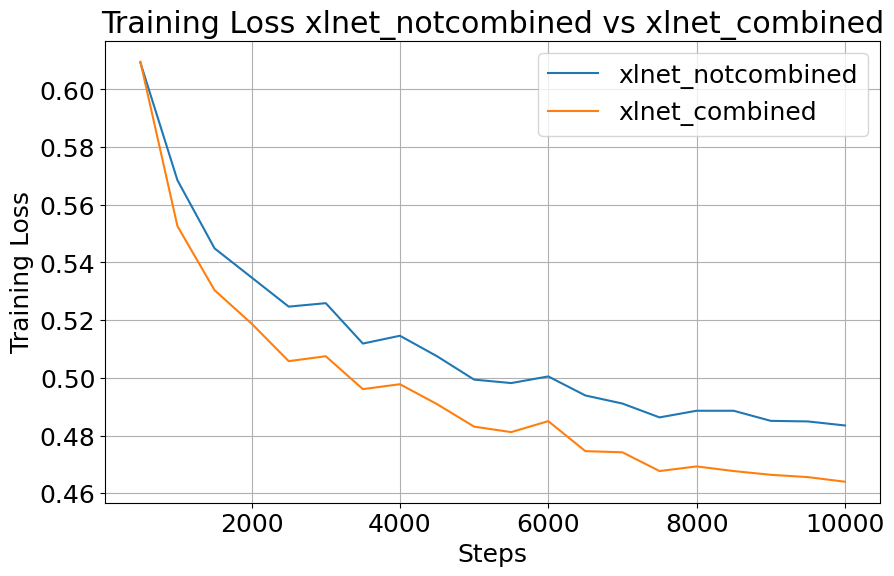

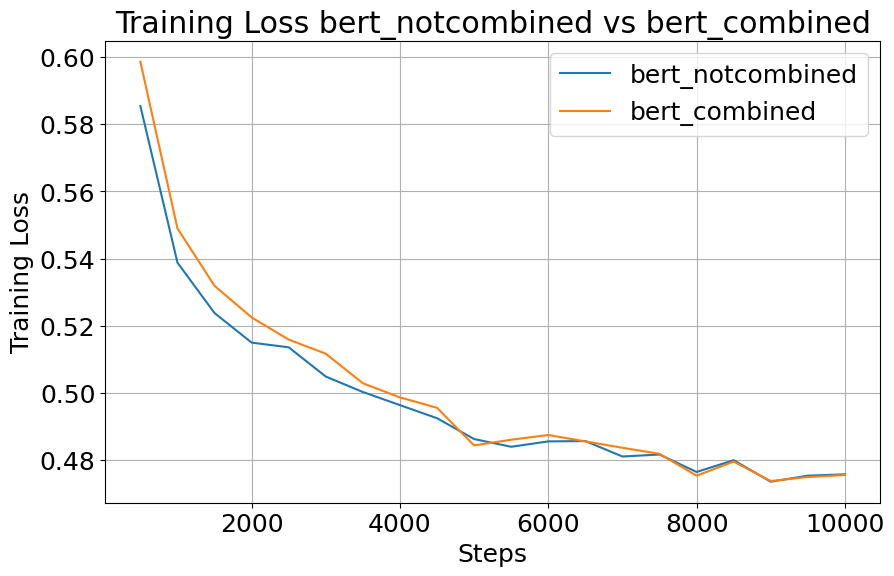

In [84]:
#Plotting individual models loss graphs
file_name = "Training Loss"
titles, dicts = zip(*loss.items())
num_dicts = len(dicts)

for i in range(0, num_dicts - 1, 2):
    plt.rcParams.update({'font.size': 18})
    title1, title2 = titles[i], titles[i + 1]
    dict1, dict2 = dicts[i], dicts[i + 1]
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(*zip(*dict1.items()), label=title1)
    ax.plot(*zip(*dict2.items()), label=title2)

    ax.set_xlabel('Steps')
    ax.set_ylabel(file_name)
    ax.set_title(file_name +" "+ title1 + " vs " + title2)

    ax.legend()

    plt.grid(True)
    plt.show()
